In [399]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [326]:
df = pd.read_csv(r"C:\Users\admin\Downloads\archive (9)\Salary_Data.csv")

In [327]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [328]:
x = df.drop("Salary",axis=1)

In [329]:
y['Salary']=df['Salary']

In [330]:
m = y['Salary'].mode()
m

0    140000.0
Name: Salary, dtype: float64

In [331]:
x['Age'] = x['Age'].fillna(x['Age'].mean())
x['Years of Experience'] =x['Years of Experience'].fillna(x['Years of Experience'].mean())
y['Salary'] =y['Salary'].fillna(y['Salary'].mode()[0])

In [332]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [333]:
le_job_title = LabelEncoder()
le_Education_Level = LabelEncoder()
le_gender = LabelEncoder()


In [334]:
x['job_title'] = le_job_title.fit_transform(x['Job Title'])
x['education_level'] = le_Education_Level.fit_transform(x['Education Level'])
x['gender'] = le_gender.fit_transform(x['Gender'])

In [335]:
x =x.drop(['Gender',	'Education Level'	,'Job Title'],axis=1)

In [336]:
from sklearn import tree

In [337]:
model = tree.DecisionTreeClassifier()

In [338]:
x.head()

,Age,Years of Experience,job_title,education_level,gender
0,32.0,5.0,177,0,1
1,28.0,3.0,18,3,0
2,45.0,15.0,145,5,1
3,36.0,7.0,116,0,0
4,52.0,20.0,26,3,1


In [339]:
from sklearn.model_selection import train_test_split

In [340]:
y.tail()

,Salary
6699,200000.0
6700,50000.0
6701,55000.0
6702,140000.0
6703,35000.0


In [341]:
x.tail()

,Age,Years of Experience,job_title,education_level,gender
6699,49.0,20.0,34,5,0
6700,32.0,3.0,116,2,1
6701,30.0,4.0,42,1,0
6702,46.0,14.0,97,4,1
6703,26.0,1.0,118,2,0


In [342]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [310]:
x_train.head()

,Age,Years of Experience,job_title,education_level,gender
1442,42.0,14.0,169,5,1
3734,36.0,8.0,95,4,0
5202,25.0,1.0,88,1,1
6534,31.0,3.0,116,2,1
2481,57.0,33.0,178,5,0


In [311]:
from sklearn.impute import SimpleImputer
import numpy as np
simple_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [401]:
from sklearn.model_selection import GridSearchCV
params = {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[2,5,7,9,13,17,18,20,21]}

In [313]:
# simple_imputer = SimpleImputer(strategy='most_frequent')

# # Impute and preserve column names and index for x_train
# x_train_imputed = simple_imputer.fit_transform(x_train)
# x_train = pd.DataFrame(x_train_imputed, columns=x_train.columns, index=x_train.index)

# # Impute and preserve column names and index for x_test
# x_test_imputed = simple_imputer.transform(x_test)
# x_test = pd.DataFrame(x_test_imputed, columns=x_test.columns, index=x_test.index)

# # Repeat for y_train and y_test if they're DataFrames
# y_train_imputed = simple_imputer.fit_transform(y_train)
# y_train = pd.DataFrame(y_train_imputed, columns=y_train.columns, index=y_train.index)

grid_search = GridSearchCV(dec_tree,params)_imputer.transform(y_test)
# y_test = pd.DataFrame(y_test_imputed, columns=y_test.columns, index=y_test.index)

,Age,Years of Experience,job_title,education_level,gender
1442,42.0,14.0,169.0,5.0,1.0
3734,36.0,8.0,95.0,4.0,0.0
5202,25.0,1.0,88.0,1.0,1.0
6534,31.0,3.0,116.0,2.0,1.0
2481,57.0,33.0,178.0,5.0,0.0


In [228]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [229]:
model.score(x_test,y_test)

0.8023862788963461

In [235]:
model.predict([[26.0,	1.0,	118,	2	,0]])

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([35000.])

In [425]:
dec_tree = tree.DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=3)

In [426]:
dec_tree.fit(x_test,y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [422]:
y_pred = dec_tree.predict(x_test)

In [423]:
dec_tree.score(x_test,y_test)

0.28560775540641314

In [400]:
confusion_matrix(y_test,y_pred)

array([[24,  2,  0, ...,  0,  0,  0],
       [ 1,  6,  0, ...,  0,  0,  0],
       [ 0,  0,  5, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  3]], dtype=int64)

In [404]:
grid_search = GridSearchCV(dec_tree,params)
grid_search.fit(x_train,y_train)

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(max_depth=80),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 7, 9, 13, 17, 18, 20, 21],
                         'splitter': ['best', 'random']})

In [405]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 17, 'splitter': 'best'}

[Text(0.5, 0.875, 'x[1] <= 6.5\nentropy = 6.028\nsamples = 1341\nvalue = [26.0, 7.0, 7.0, 3.0, 7.0, 4.0, 28.0, 1.0, 1.0, 2.0\n16.0, 1.0, 2.0, 2.0, 18.0, 4.0, 4.0, 34.0, 1.0, 1.0\n5.0, 3.0, 1.0, 1.0, 46.0, 8.0, 3.0, 48.0, 1.0, 1.0\n27.0, 1.0, 1.0, 34.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0\n31.0, 1.0, 3.0, 2.0, 1.0, 39.0, 1.0, 1.0, 1.0, 23.0\n1.0, 1.0, 1.0, 1.0, 36.0, 1.0, 2.0, 5.0, 1.0, 31.0\n1.0, 1.0, 1.0, 2.0, 44.0, 1.0, 1.0, 1.0, 1.0, 1.0\n17.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 39.0, 2.0, 1.0\n17.0, 3.0, 1.0, 61.0, 1.0, 2.0, 1.0, 3.0, 1.0, 10.0\n2.0, 1.0, 1.0, 1.0, 43.0, 1.0, 1.0, 13.0, 1.0, 2.0\n1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 63.0, 1.0, 2.0, 1.0\n1.0, 1.0, 1.0, 13.0, 1.0, 1.0, 30.0, 1.0, 2.0, 1.0\n1.0, 12.0, 1.0, 1.0, 1.0, 50.0, 1.0, 1.0, 3.0, 1.0\n1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 44.0\n1.0, 2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0\n1.0, 1.0, 1.0, 2.0, 1.0, 38.0, 1.0, 1.0, 1.0, 1.0\n1.0, 42.0, 1.0, 1.0, 1.0, 1.0, 1.0, 50.0, 3.0, 1.0\n1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 29.0, 1.0,

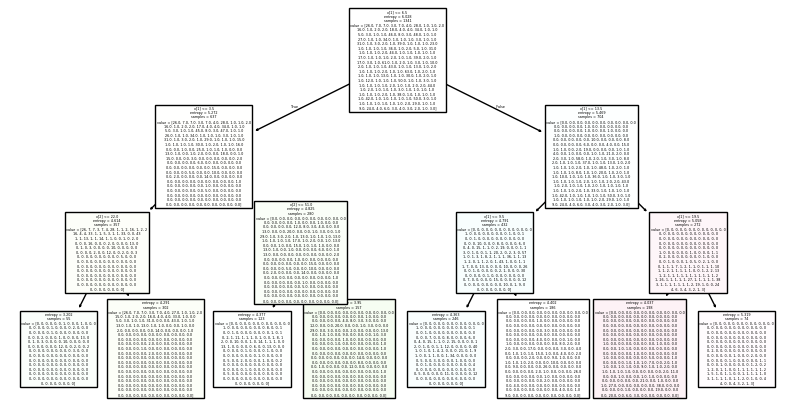

In [428]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plot_tree(dec_tree,filled=True,class_name=)

## voting Classifier

In [434]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [440]:

lr = LogisticRegression()
sv = SVC()
model

DecisionTreeClassifier()

In [441]:
vot_class = VotingClassifier(estimators=[('lr',lr),('sv',sv),('dt',model)],voting='hard',)

In [442]:
vot_class.fit(x_train,y_train)

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to t

VotingClassifier(estimators=[('lr', LogisticRegression()), ('sv', SVC()),
                             ('dt', DecisionTreeClassifier())])

In [444]:
y_pred = vot_class.predict(x_test)

In [445]:
accuracy_score(y_test,y_pred)

0.3586875466070097

In [448]:
vot_class.score(x_test,y_test)

0.3586875466070097

In [450]:
for i in (lr,model,sv):
    i.fit(x_train,y_train)
    y_pred = i.predict(x_test)
    print(i.__class__,accuracy_score(y_pred,y_test))

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed w

<class 'sklearn.linear_model._logistic.LogisticRegression'> 0.13348247576435496
<class 'sklearn.tree._classes.DecisionTreeClassifier'> 0.8158090976882924
<class 'sklearn.svm._classes.SVC'> 0.13124533929903057
